# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [1]:
import numpy as np 
import pandas as pd 
from copy import deepcopy
from matplotlib import pyplot as plt
%matplotlib inline

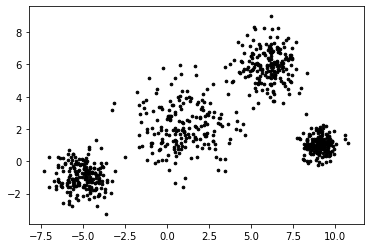

In [2]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

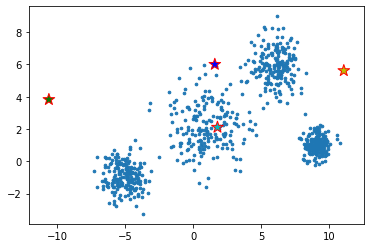

In [3]:
# set number of clusters
k = 4

# Number of training data
n = data.shape[0]

# Number of features in the data
c = data.shape[1]

# generate random ceters
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centroids = np.random.randn(k,c)*std + mean

# scatter plot with the four centroids
plt.scatter(data[:,0], data[:,1], s=7)
colors=['g','b','y','c']
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c=colors, s=150, edgecolor='r')

## 2. Visualise the clustering results in each iteration

### Explanation of K-means algorithm

K-means is a clustering method where the following steps are done:

1. K number of random centroids are selected for our data.
2. The euclidian distance is calculated between each data point and each centroid. 
3. Data points are assigned to the closest centroid, hence forming k number of clusters.
4. New centroids are calculated by taking the mean of all data points in each cluster.
5. Step 3 and step 4 are repeated until the change in the newly assigned centroids is small or does not change, thereby forming k number of clusters with centroids.



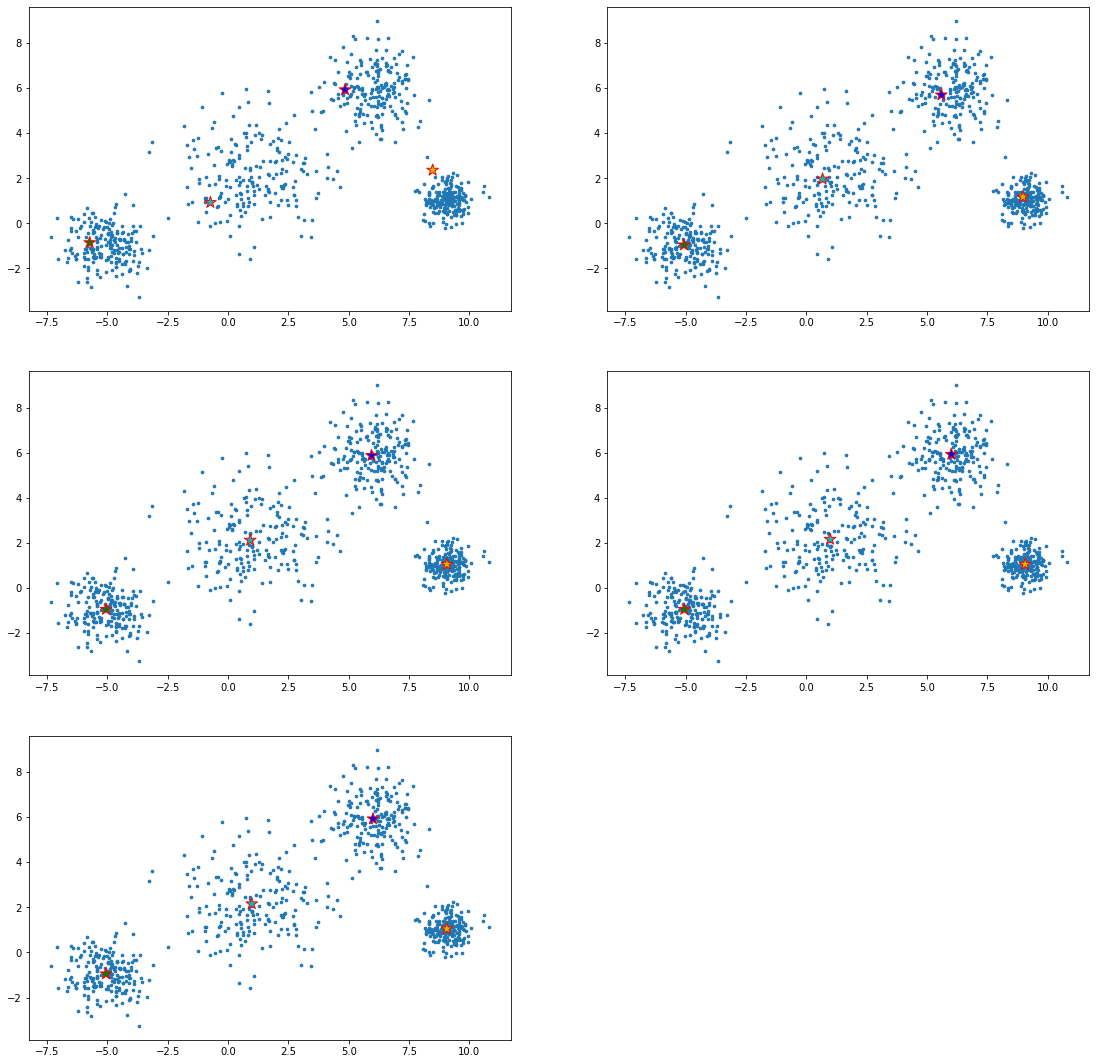

In [6]:
# keep track of old and new centroids
centroids_old = np.zeros(centroids.shape) 
centroids_new = deepcopy(centroids)

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centroids_new - centroids_old)

fig = plt.figure(figsize=(19,19))
plot_count = 321

while error != 0:
    # Measure the distance to every centroids
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centroids_new[i], axis=1)
    # Assign all training data to closest centroids
    clusters = np.argmin(distances, axis = 1)
    
    centroids_old = deepcopy(centroids_new)
    # Calculate mean for every cluster and update the centroid
    for i in range(k):
        centroids_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centroids_new - centroids_old)
    
    # scatter plot with updated centroids
    ax = fig.add_subplot(plot_count)
    ax.scatter(data[:,0], data[:,1], s=7)
    ax.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c=colors, s=150, edgecolor='r')
    plot_count += 1   
